# Notebook du projet

## Situation initiale

On modélise la situation initiale :  
    -Le nombre d'individu  
    -Les individus parmi eux possédant un Samsung (simulé aléatoirement)  
    -Le nombre d'individu possédant un Samsung à l'état initial

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
n = 50 # nombre d'individus

In [4]:
# Liste aléatoire de 0 et de 1 de taille n, 0 pour Samsung et 1 pour Apple
X_0 = np.asarray([random.randint(0,1) for i in range(n)])

In [5]:
# Nombre de Samsung à l'état initial
S_0 = sum(X_0[i] == 0 for i in range(n))

## Chaîne de Markov $S(t)_t$

On définit la chaîne de Markov que l'on va étudier.  
$S(t)$ définit le nombre d'individu possédant un Samsung dans le groupe à l'instant $t$.

In [6]:
def nbr_samsung(X_0):
    
    """Fonction qui compte le nombre d'indivu possédant un Samsung dans une liste d'individu
       La liste doit être un numpy array"""
    
    # Nombre de Samsung dans l'ensemble des individus
    S = (np.sum(X_0 == 0))
    return int(S) 

In [7]:
nbr_samsung(X_0)

23

# A) Cas d'un graphe complet

Dans la suite, on étudie le cas d'un graphe complet.  
C'est à dire que chaque individu est en relation avec chacun de ses voisins.

## Modèle 1 : Avis de la majorité des voisins

Dans le modèle 1, on tire un individu au hasard dans le groupe à chaque instant $t$.  
Ce dernier va alors changer de marque de smartphone en suivant l'avis de la majorité de ses voisins.  
En cas d'égalité, il ne change pas de marque.

### Implémentation du processus

In [8]:
def model_1(X_0):
    
    """Implémentation de l'évolution du modèle 1
       Renvoie la liste après une étape du processus
       Fonctionne avec des numpy array"""
    
    X = np.copy(X_0)
    i = np.random.choice(len(X)) # on tire un individu X_i au hasard dans la liste X
    V = np.delete(X,i)           # ensemble des voisins de l'individu X_i
    
    # Condition d'évolution de la méthode 1
    if  np.sum(V == 1) > np.sum(V == 0):            
        X[i] = 1
    else:
        X[i] = 0

    return X

In [9]:
model_1(X_0)

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1])

In [10]:
def model_1_iter(X_0, t):
    
    """Fonction itérative du modèle 1
       Renvoie une des listes possibles après t étapes du processus
       Fonctionne avec des numpy array"""
    
    X = np.copy(X_0)
    k = 0
    while (k<t):
        X = np.copy(model_1(X))
        k = k+1
    return X

In [11]:
model_1_iter(X_0, 7)

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1])

In [12]:
def model_1_recu(X_0, t):
    
    """Fonction récursive du modèle 1
       Applique t fois le processus du modèle 1 à la même liste
       Fonctionne avec des numpy array"""
    
    X = np.copy(X_0)
    
    if (t == 0):
        return X
    else:
        return model_1(model_1_recu(X,t-1))

In [13]:
model_1_recu(X_0, 9)

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1])

## Modèle 2 : Avis d'un seul voisin

Dans le modèle 2, on tiré également un individu au hasard à chaque instant $t$.  
Mais cette fois-ci, il change de marque (ou pas) en se basant uniquement sur l'avis d'un seul de ses voisins (lui aussi tiré au hasard).

### Implémentation du processus

In [14]:
def model_2(X_0):
    
    """Implémentation de l'évolution du modèle 2
       Renvoie la liste après une étape du processus
       Fonctionne avec des numpy array"""
    
    X = np.copy(X_0)    
    i = np.random.choice(len(X)) # on tire un individu X_i au hasard dans la liste X
    V = np.delete(X,i)           # V_i ensemble des voisins de l'individu X_i
    j = np.random.choice(len(V)) # on tire un individu X_j au hasard dans l'ensemble V_i
    
    X[i] = np.copy(V[j])
    
    return X

In [15]:
model_2(X_0)

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1])

In [16]:
def model_2_iter(X_0, t):
    
    """Fonction itérative du modèle 2
       Renvoie une des listes possibles après t étapes du processus
       Fonctionne avec des numpy array"""
    
    X = np.copy(X_0)
    k = 0
    
    while (k<t):
        k = k+1
        X =np.copy(model_2(np.copy(X)))
    return X

In [17]:
model_2_iter(X_0, 7)

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1])

In [18]:
def model_2_recu(X_0, t):
    
    """Fonction récursive du modèle 1
       Applique t fois le processus du modèle 1 à la même liste
       Fonctionne avec des numpy array"""
    
    X = np.copy(X_0)
    
    if (t == 0):
        return X
    else:
        return model_2(model_2_recu(X, t-1))    

In [19]:
model_2_recu(X_0, 9)

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1])

## Temps d'atteintes des états absorbants

Dans cette partie, on s'intéresse au temps que met une des deux marques pour atteindre un monopole dans le groupe.  

### Modèle 1

In [20]:
def temps_att_1(X_0):
    
    """Fonction qui calcul le nombre d'étape nécessaire pour atteindre l'un des deux états absorbants dans le modèle 1"""
    
    cpt = 0 # variable qui compte le nombre d'étapes
    X = X_0
    Z = np.zeros(len(X_0)) # état absorbant S(t)=0
    U = np.ones(len(X_0))  # état absorbant S(t)=n
    
    while ( np.array_equal(X,Z) or np.array_equal(X,U) ) == False:
        cpt = cpt + 1
        X = model_1_recu(X,1)
    return cpt

In [21]:
temps_att_1(X_0)

193

### Modèle 2

In [22]:
def temps_att_2(X_0):
    
    """Fonction qui calcul le nombre d'étape nécessaire pour atteindre l'un des deux états absorbants dans le modèle 2"""
    
    cpt = 0 # variable qui compte le nombre d'étapes
    X = X_0
    Z = np.zeros(len(X_0)) # état absorbant S(t)=0
    U = np.ones(len(X_0))  # état absorbant S(t)=n
    
    while ( np.array_equal(X,Z) or np.array_equal(X,U) ) == False:
        cpt = cpt + 1
        X = model_2_recu(X,1)
    return cpt

In [23]:
temps_att_2(X_0)

772

## Trajectoires de la chaîne de Markov $S(t)$

On s'intéresse ici à l'évolution de la chaine de markov $S(t)_t$ après plusieurs étapes du processus 1 ou 2.  
On compare visuellement les deux trajectoires.

In [24]:
%matplotlib notebook

### Modèle 1

In [25]:
def traj_model_1(X_0, t):

    """Fonction qui donne les t premiers éléments de la chaine de Markov S dans le modèle 1 avec pour état initial X_0"""

    S = np.zeros(t+1)
    S[0] = nbr_samsung(X_0)
    
    for i in range(1,t+1):
        X_0 = model_1_recu(X_0,1)
        S[i] = nbr_samsung(X_0)
    
    return S

In [26]:
traj_model_1(X_0,10)

array([23., 23., 23., 23., 22., 21., 21., 20., 19., 19., 19.])

### Modèle 2

In [27]:
def traj_model_2(X_0, t):

    """Fonction qui donne les t premiers éléments de la chaine de Markov S dans le modèle 2 avec pour état initial X_0"""

    S = np.zeros(t+1)
    S[0] = nbr_samsung(X_0)
    
    for i in range(1,t+1):
        X_0 = model_2_recu(X_0,1)
        S[i] = nbr_samsung(X_0)
    
    return S

In [28]:
traj_model_2(X_0,10)

array([23., 24., 24., 24., 24., 24., 23., 22., 21., 21., 21.])

### Tracé des trajectoires

<IPython.core.display.Javascript object>


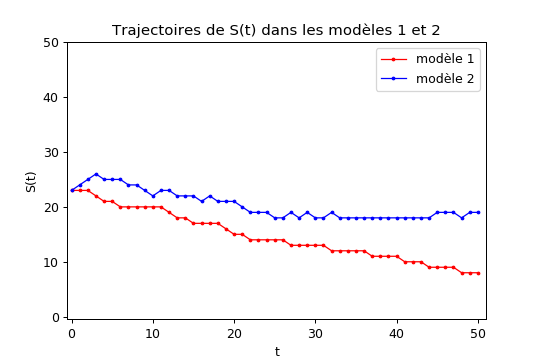

In [32]:
k = nbr_samsung(X_0)

u = np.linspace(0,n,n+1)

fig = plt.figure(1,figsize=(6,4))

# On trace 3 trajectoires
plt.plot(u,traj_model_1(X_0,n),"-ro",label="modèle 1",ms=2,linewidth=1)

plt.plot(u,traj_model_2(X_0,n),"-bo",label="modèle 2",ms=2,linewidth=1) 

plt.title('Trajectoires de S(t) dans les modèles 1 et 2')
plt.xlabel('t')
plt.ylabel('S(t)')
plt.xlim(-0.5,n+1)
plt.ylim(-0.5,n)
plt.legend()
plt.show()

# B) Cas d'un graphe non-complet

Dans cette partie, on s'intéresse à l'évolution de la chaîne de markov $S(t)_t$ dans le cas d'un graphe non-complet.  
C'est à dire que chaque individu n'est pas forcément en relation avec l'ensemble de ses voisins.

## Le graphe aléatoire d'Erdos-Rényi

Le graphe d'Erdos-Rényi est un type de graphe aléatoire.  
On prend un graphe à $n$ sommets avec un maximum de $\frac{n(n-1)}{2}$ arêtes uniques possibles entre les sommets.  
Chaque arête existe alors avec une probabilité $p$.  
On parle de graphe aléatoire $binomiale$ car le nombre $N_p$ d'arêtes de ${\displaystyle \mathbb {G} (n,p)}$ suit la loi binomiale de paramètres ($\frac{n(n–1)}{2}, p$).

In [17]:
# Probabilité d'existence d'une arête dans le graphe aléatoire  
p = random.uniform(0,1)